# Trying a handful of dimensionality reduction techniques

In [1]:
import matplotlib.pyplot as plt

import scipy as sp
import scipy.io
import numpy as np
import os
os.sys.path.append('../behavior')
os.sys.path.append('../')
from behavior_analysis import process_data as pd
from behavior_analysis import loadmat_sbx

import sklearn as sk
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas 
import h5py
from utilities import load_ca_mat
from scipy.ndimage.filters import gaussian_filter

%load_ext autoreload
%autoreload 2

%matplotlib inline

C:\Users\mplitt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
CaDataDir = "Z://2P_data/2AFC_V3/4058541.1/CA1/"
mouse = "4058541.1"
CaFiles = ["CA1_001_004", "CA1_002_008", "CA1_003_002","CA1_004_002","CA1_005_001"] 
vr_dir = "Z://VR/2AFC_V3/"
BehaviorFiles = ["1_imaging_","2_imaging_3_",  "3_", "4_imaging_", "5_imaging_"]

In [3]:
vr_dir = "Z://VR/2AFC_V3/"
mouse = "4058541.3"
CaDataDir = "Z://2P_data/2AFC_V3/" + mouse + "/CA1//"
CaFiles = ["CA1_001_002" ,"CA1_002_002", "CA1_003_002","CA1_004_001","CA1_005_002"] 
BehaviorFiles = ["1_imaging_",  "2_", "3_", "4_imaging_", "5_imaging_"]

In [5]:
sessions = []
Behavior = []
Ca_Dat = []

for i in range(len(CaFiles)):
    info = loadmat_sbx(CaDataDir + "/rawDat/" + CaFiles[i] + ".mat")['info']
    sess = "2AFC_Test_PostSurg_" + BehaviorFiles[i]
    c = pd(mouse,sess)
    if mouse=="4058541.3":
        behavior,tstart_inds,reward_inds,first_lick_inds = c.align_to_ca(sess,info,nplanes=2)
    else:
        behavior,tstart_inds,reward_inds,first_lick_inds = c.align_to_ca(sess,info,nplanes=1)
    
    fname= CaDataDir+ CaFiles[i] +"_cnmf_results.mat"
    print(fname)
    ca_dat = load_ca_mat(fname)
    
    sessions.append(sess)
    Behavior.append(behavior)
    Ca_Dat.append(ca_dat)

Z://2P_data/2AFC_V3/4058541.3/CA1///rawDat/CA1_001_002.mat


NameError: name 'basedir' is not defined

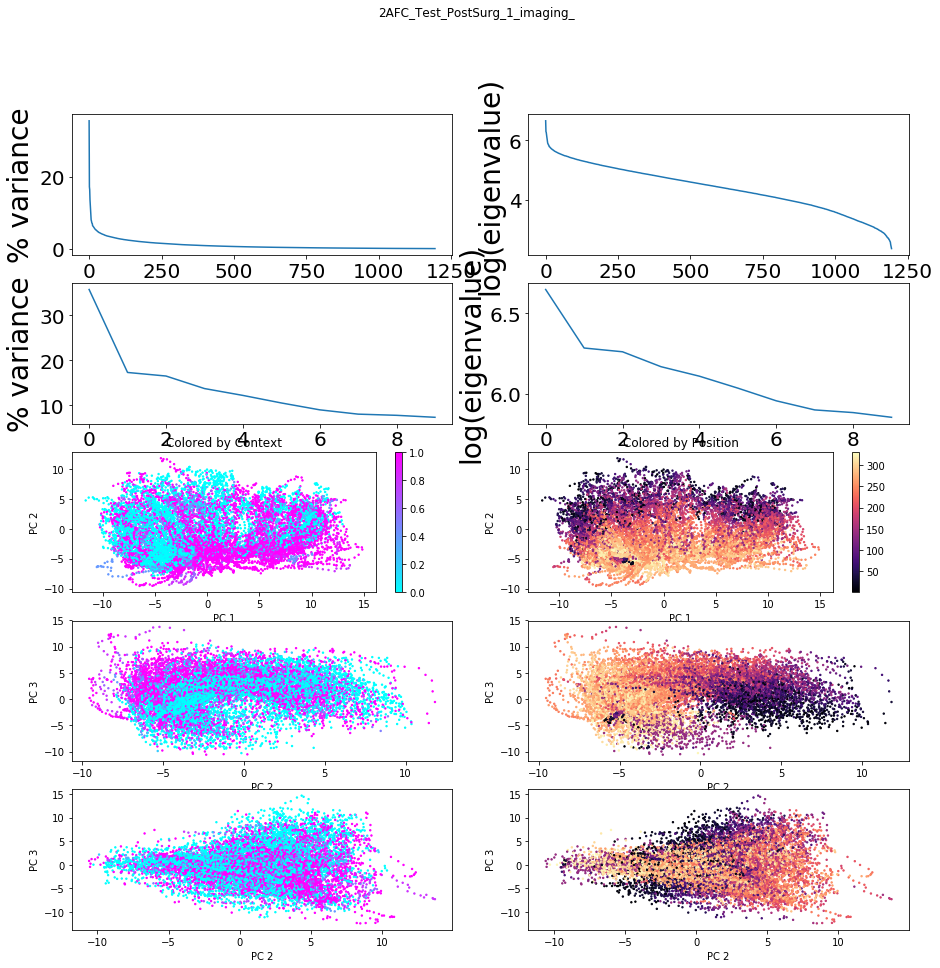

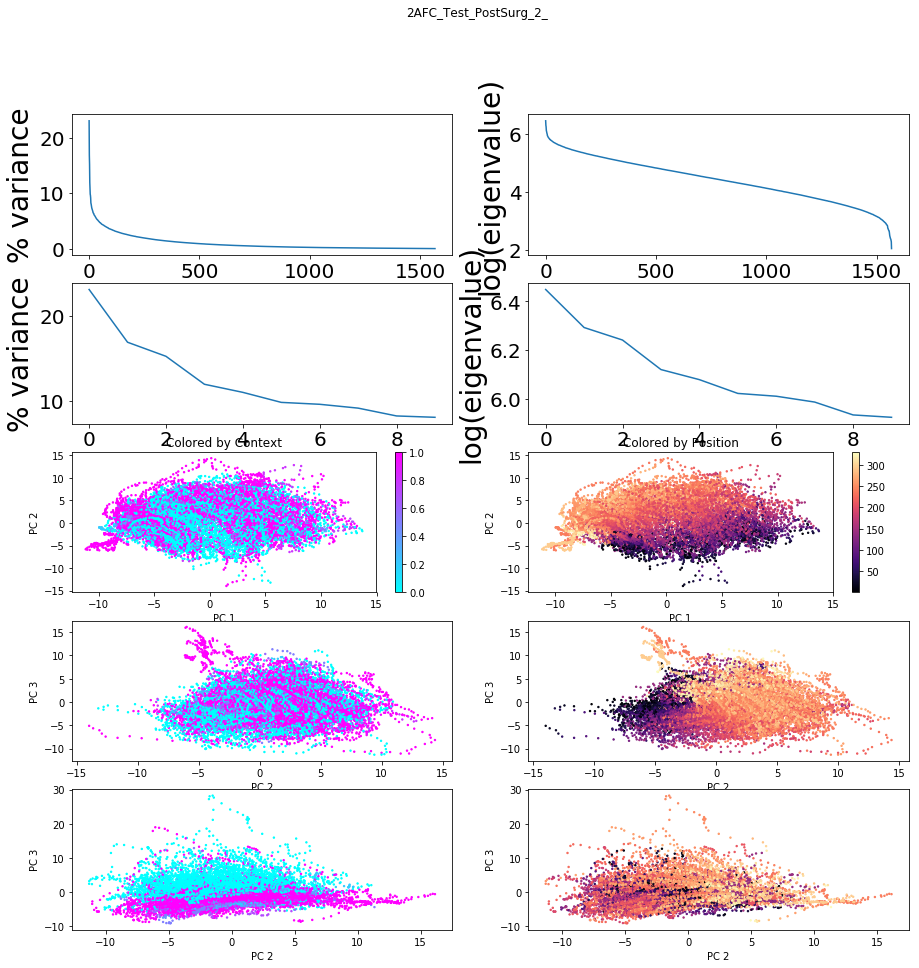

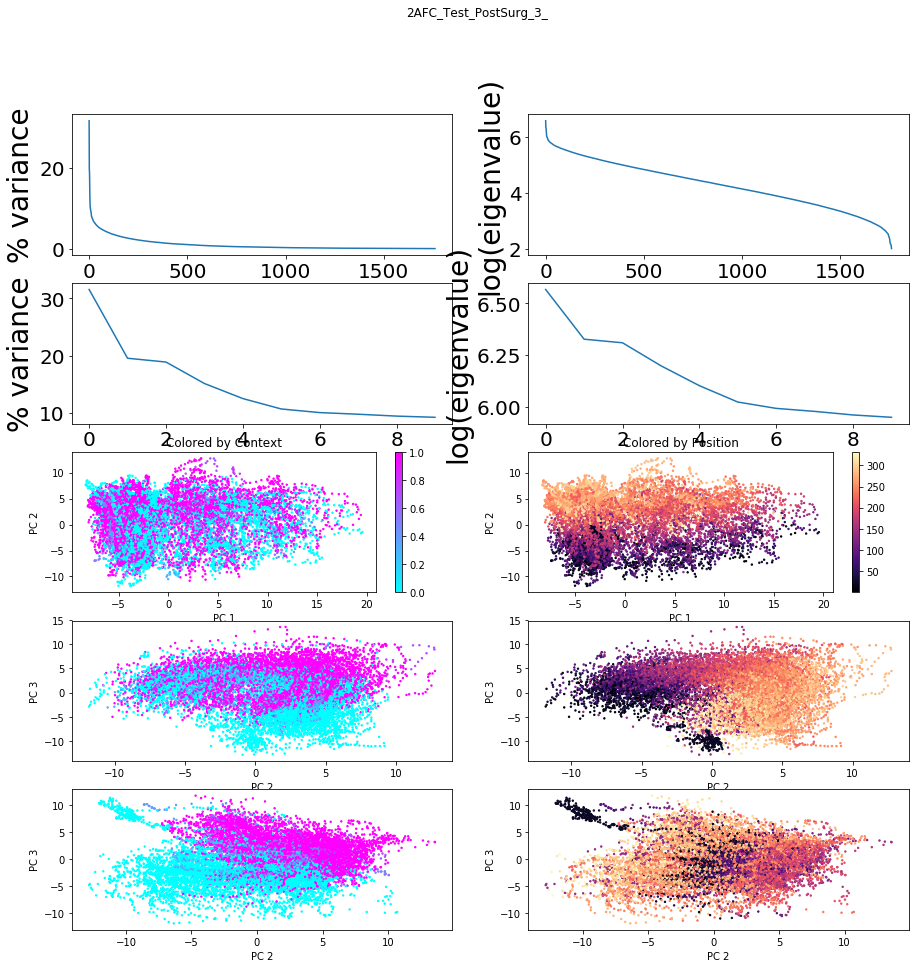

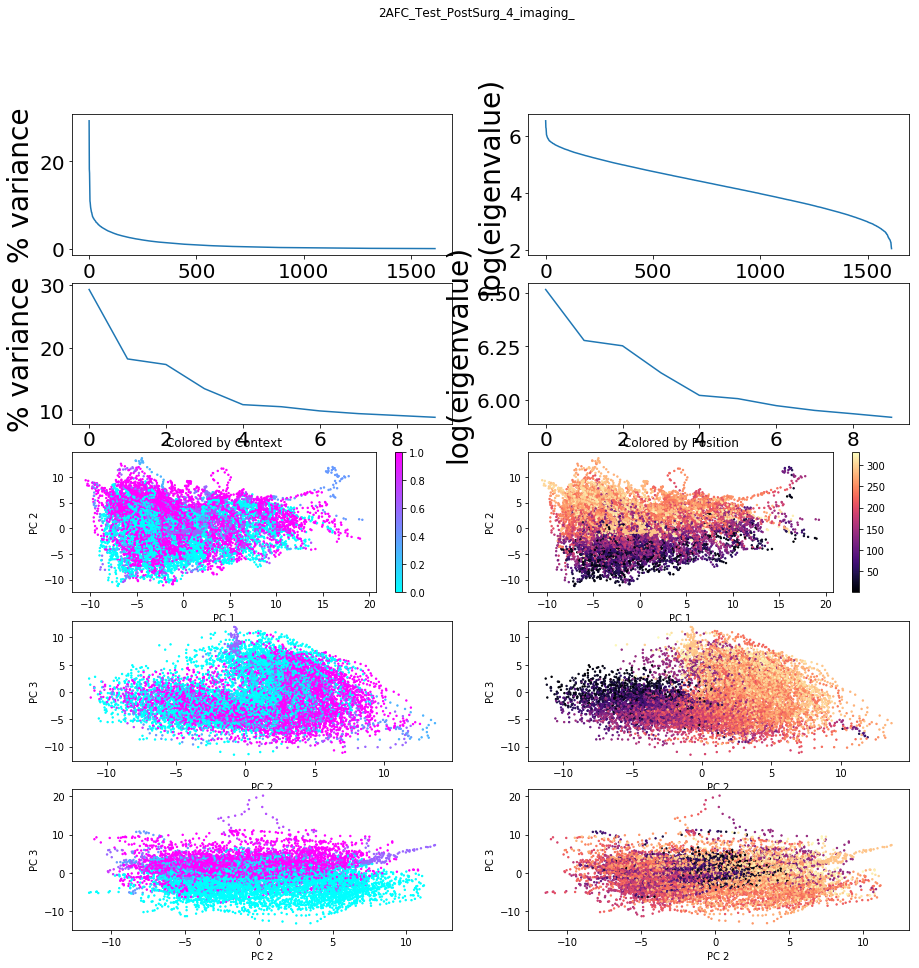

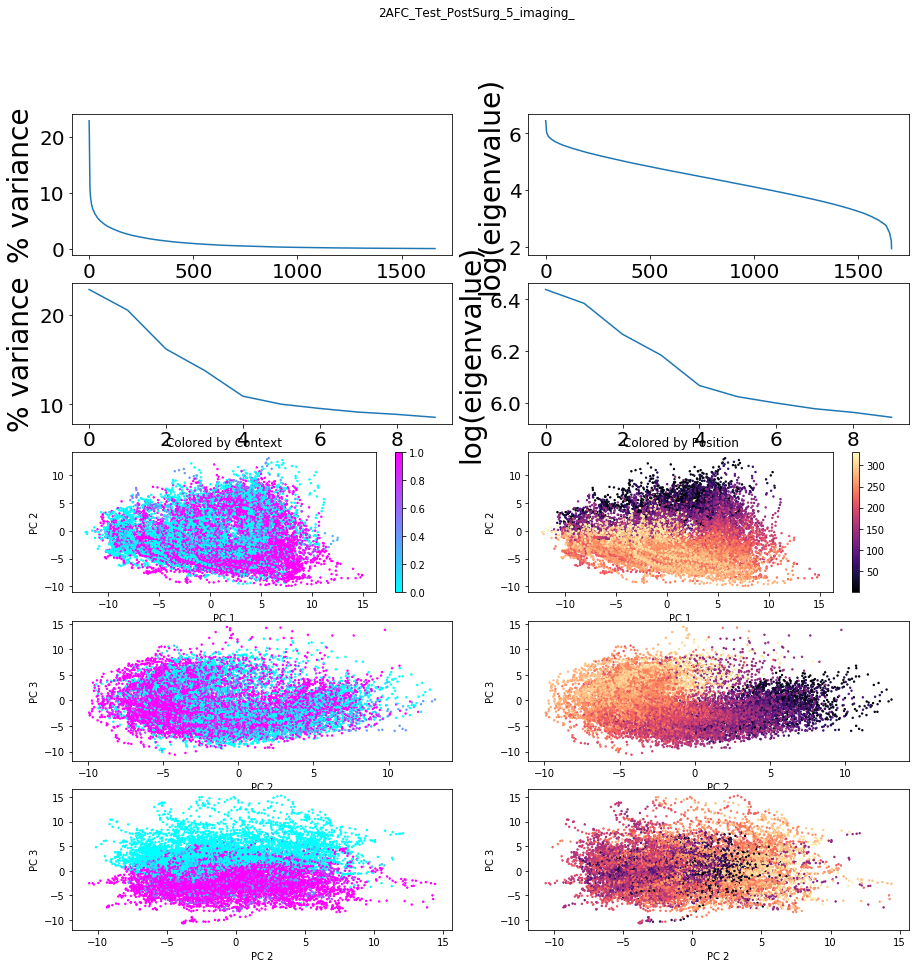

In [5]:
for i in range(len(CaFiles)):
    
    pca = PCA()
    C_dec = sp.stats.zscore(Ca_Dat[i]['C_dec'][Behavior[i]['ca_inds'].values,:],axis=0)
    C_pca = pca.fit_transform(C_dec)
    
    # skree plots
    f,axarr = plt.subplots(5,2,figsize=[15,15])
    plt.suptitle(sessions[i],figure= f,size='large')
    axarr[0,0].plot(pca.explained_variance_)
    axarr[0,0].set_ylabel("% variance",size=28)
    axarr[0,0].tick_params(labelsize=20)

    axarr[0,1].plot(np.log(pca.singular_values_))
    axarr[0,1].set_ylabel("log(eigenvalue)",size=28)
    axarr[0,1].tick_params(labelsize=20)

    axarr[1,0].plot(pca.explained_variance_[:10])
    axarr[1,0].set_ylabel("% variance",size=28)
    axarr[1,0].tick_params(labelsize=20)


    axarr[1,1].plot(np.log(pca.singular_values_[:10]))
    axarr[1,1].set_ylabel("log(eigenvalue)",size=28)
    axarr[1,1].tick_params(labelsize=20)

    
    trialMask = Behavior[i]['position'].values>0
    context_trialMask = (Behavior[i]['position'].values>0) & (Behavior[i]['morph'].values!=0) &(Behavior[i]['morph'].values!=1)



    s_cxt=axarr[2,0].scatter(C_pca[trialMask,0],C_pca[trialMask,1],c=Behavior[i]['morph'].values[trialMask],cmap='cool',s=2)
    plt.colorbar(s_cxt,ax=axarr[2,0])
    axarr[2,0].set_title('Colored by Context')
    axarr[2,0].set_xlabel("PC 1")
    axarr[2,0].set_ylabel("PC 2")

    s_pos=axarr[2,1].scatter(C_pca[trialMask,0],C_pca[trialMask,1],c=Behavior[i]['position'].values[trialMask],cmap='magma',s=2)
    plt.colorbar(s_pos,ax=axarr[2,1])
    axarr[2,1].set_title('Colored by Position')
    axarr[2,1].set_xlabel("PC 1")
    axarr[2,1].set_ylabel("PC 2")

    s_cxt=axarr[3,0].scatter(C_pca[trialMask,1],C_pca[trialMask,2],c=Behavior[i]['morph'].values[trialMask],cmap='cool',s=2)
    axarr[3,0].set_xlabel("PC 2")
    axarr[3,0].set_ylabel("PC 3")

    s_cxt=axarr[3,1].scatter(C_pca[trialMask,1],C_pca[trialMask,2],c=Behavior[i]['position'].values[trialMask],cmap='magma',s=2)
    axarr[3,1].set_xlabel("PC 2")
    axarr[3,1].set_ylabel("PC 3")
    
    s_cxt=axarr[4,0].scatter(C_pca[trialMask,2],C_pca[trialMask,3],c=Behavior[i]['morph'].values[trialMask],cmap='cool',s=2)
    axarr[4,0].set_xlabel("PC 2")
    axarr[4,0].set_ylabel("PC 3")

    s_cxt=axarr[4,1].scatter(C_pca[trialMask,2],C_pca[trialMask,3],c=Behavior[i]['position'].values[trialMask],cmap='magma',s=2)
    axarr[4,1].set_xlabel("PC 2")
    axarr[4,1].set_ylabel("PC 3")

# DPCA

Think of if we could use CCA to rotate the acticity over time to maximally correlate - align discriminant over days, look at drift in discriminant , etc

# NMF

In [7]:
from sklearn.decomposition import NMF

Ca_raw = Ca_Dat[-1]['C_dec'][Behavior[-1]['ca_inds'].values,:]
nmf = NMF(verbose=True)
W=nmf.fit_transform(Ca_raw)

violation: 1.0
violation: 0.19864399635725527
violation: 0.09678246751851201
violation: 0.062192638821870726
violation: 0.04486614347229531
violation: 0.03417936404209846
violation: 0.027100294307472694
violation: 0.022043055886821313
violation: 0.01859318673013915
violation: 0.016095357798234688
violation: 0.01409698003079165
violation: 0.012506043700770053
violation: 0.011376244830558616
violation: 0.010462159721566661
violation: 0.009775271018713061
violation: 0.009316456595501548
violation: 0.0089681320726941
violation: 0.008548110665094321
violation: 0.007962225317259344
violation: 0.007389659613058889
violation: 0.006943502349834373
violation: 0.006629823243960615
violation: 0.006445152712379912
violation: 0.006367361948352886
violation: 0.006272953995802751
violation: 0.00611304079359611
violation: 0.005940803722713967
violation: 0.005801736234804897
violation: 0.005723840991114218
violation: 0.005639527093173038
violation: 0.005495870894511519
violation: 0.005318230029005807
vi

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=None, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=True)

violation: 1.0
violation: 0.2159753051119372
violation: 0.05325124108362369
violation: 0.023753434091798087
violation: 0.013064328498890204
violation: 0.008091728991464642
violation: 0.005444196995347994
violation: 0.003908156153120859
violation: 0.002947958984191648
violation: 0.0023199004032726403
violation: 0.0018900969369122483
violation: 0.00157989503528386
violation: 0.0013475012798226426
violation: 0.0011704287475649748
violation: 0.0010314642087470157
violation: 0.0009220060700070936
violation: 0.0008340810754949414
violation: 0.0007618337590156816
violation: 0.0007020719242516988
violation: 0.0006528967603663871
violation: 0.000611339865054643
violation: 0.0005757915597141864
violation: 0.0005449946997533081
violation: 0.0005174489813629099
violation: 0.0004929001470245428
violation: 0.0004705684519434781
violation: 0.0004504348062066978
violation: 0.00043220980740153704
violation: 0.00041552609068222507
violation: 0.0003998827740999158
violation: 0.00038524131268538174
violat

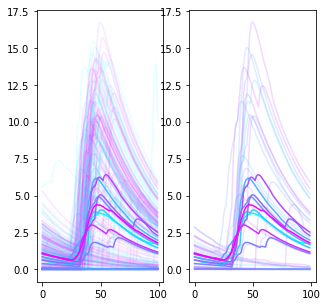

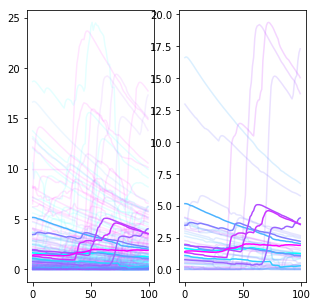

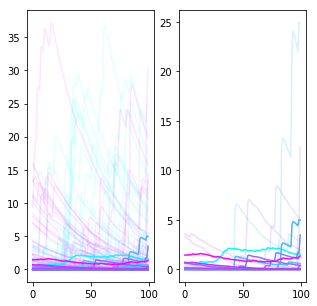

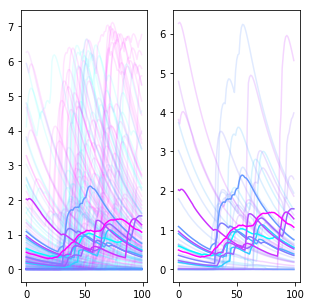

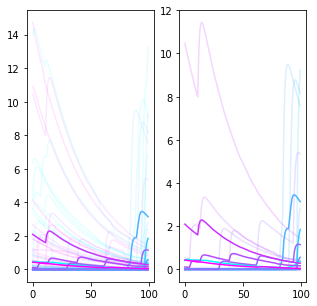

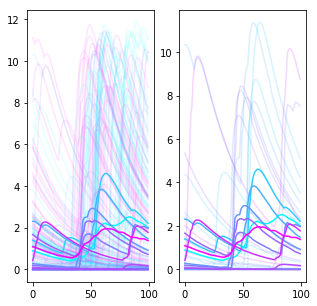

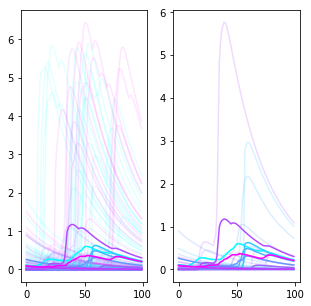

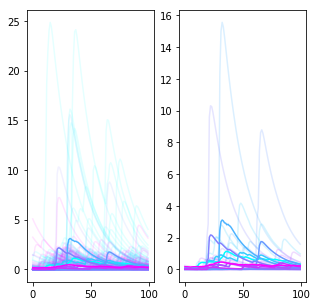

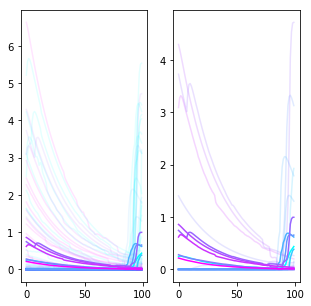

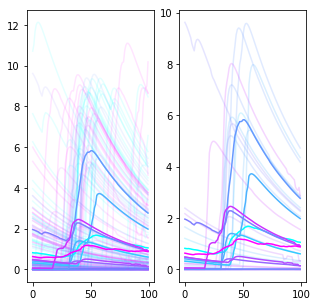

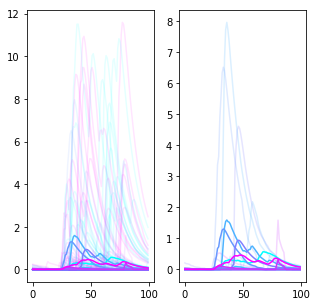

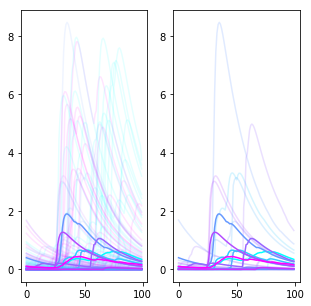

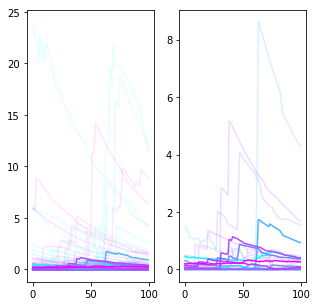

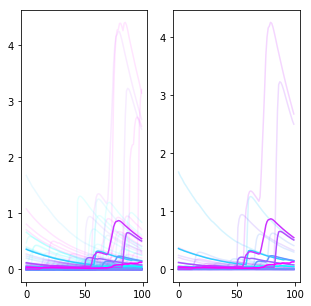

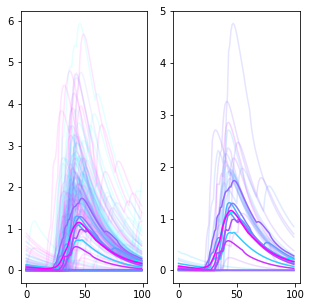

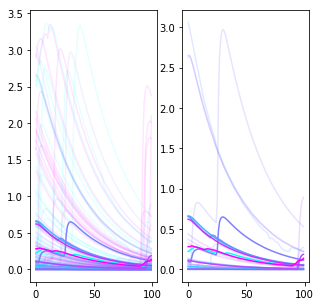

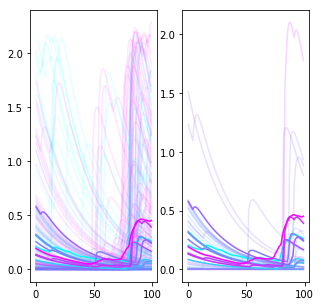

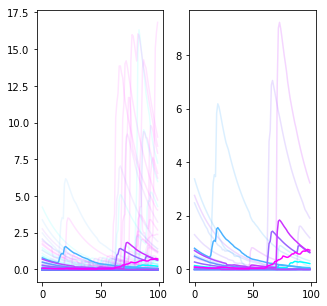

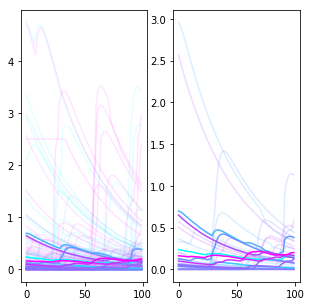

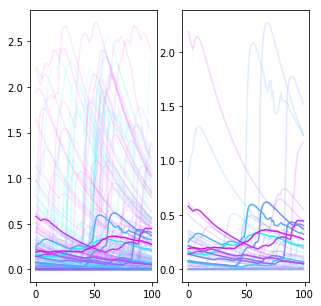

In [16]:
import utilities
W = nmf.transform(Ca_raw)
print(W.shape)
print(Ca_raw.shape)
# skree plots


trialMask = Behavior[-1]['position'].values>0
    #context_trialMask = (Behavior[-1]['position'].values>0) & (Behavior[-1]['morph'].values!=0) &(Behavior[-1]['morph'].values!=1)

trialMat, morphVec = utilities.trial_tensor(W,behavior['morph'].values,tstart_inds)

morphAvg, morphVals = utilities.across_trial_avg(trialMat,morphVec)

print("onto loop")
print(morphAvg.shape)
#print(trialMat.shape)
#ax[0].plot(trialMat[0,:,:])
for j in range(20):
    f,ax = plt.subplots(1,2,figsize=[5,5])

    for ind,t in enumerate(tstart_inds.tolist()):
        ax[0].plot(trialMat[ind,:,j],c=plt.cm.cool(morphVec[ind]),alpha=.1)
        

        if (morphVec[ind]!=1.0) and (morphVec[ind]!=0.0):
            ax[1].plot(trialMat[ind,:,j],c=plt.cm.cool(behavior['morph'].values[t]),alpha=.2)
            

    
    for i,val in enumerate(morphVals.tolist()):
        ax[0].plot(np.squeeze(morphAvg[i,:,j]),c=plt.cm.cool(val))
        ax[1].plot(np.squeeze(morphAvg[i,:,j]),c=plt.cm.cool(val))

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


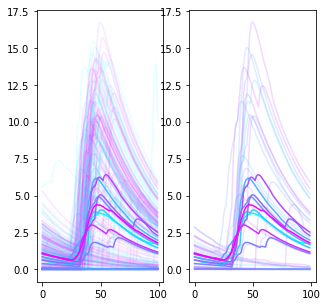

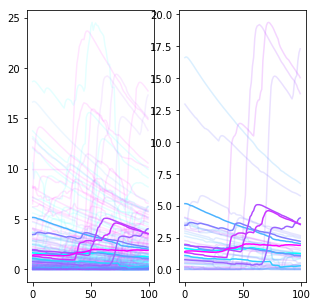

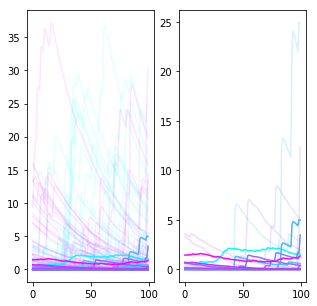

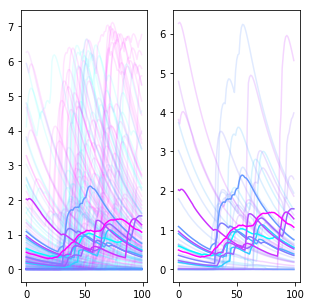

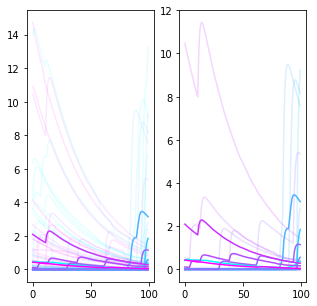

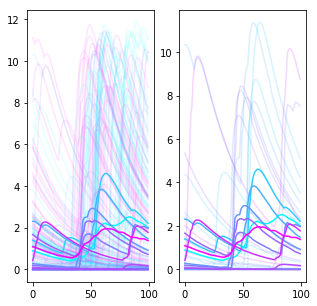

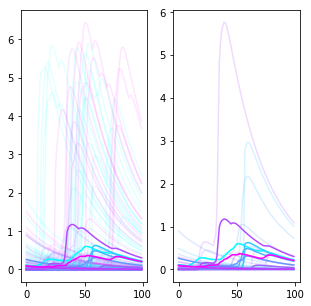

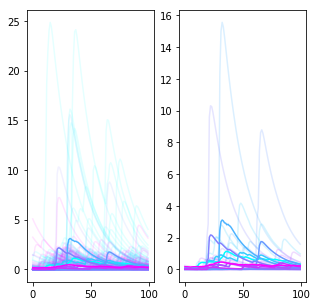

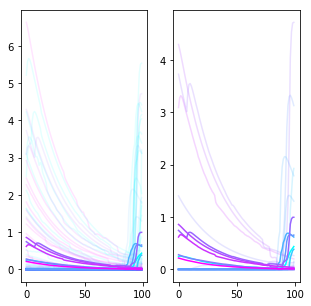

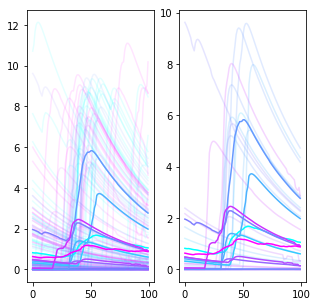

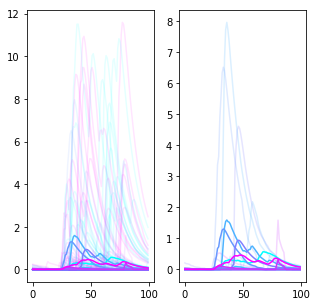

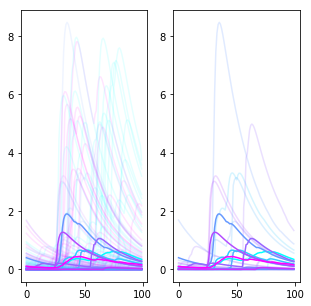

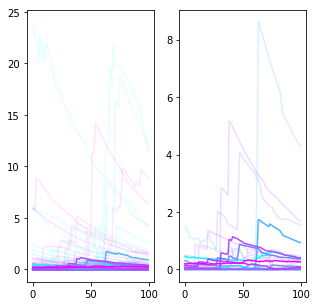

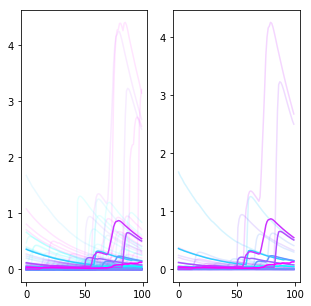

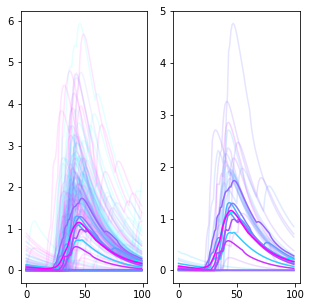

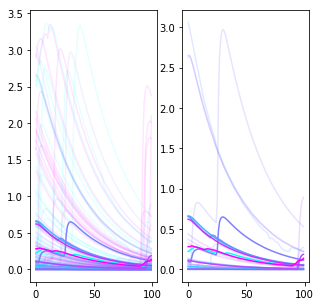

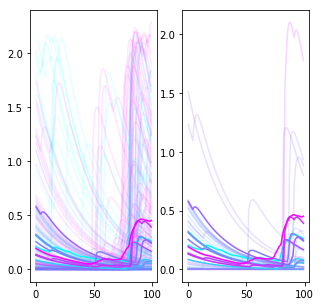

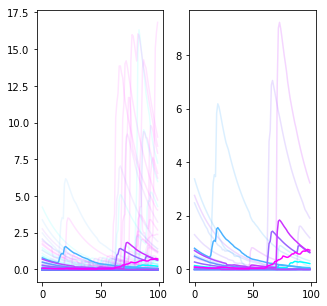

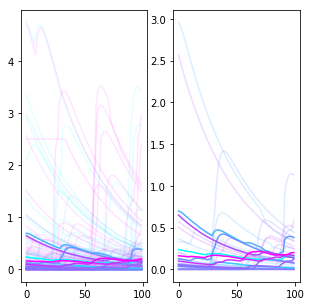

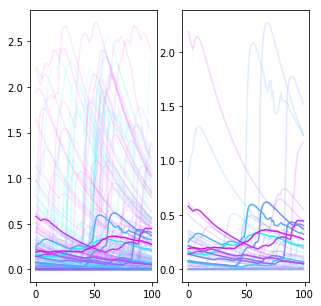

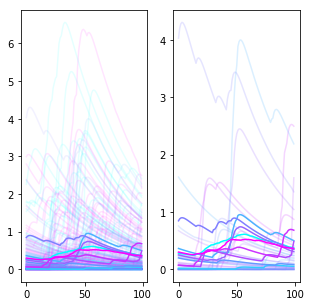

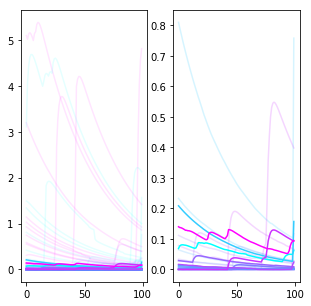

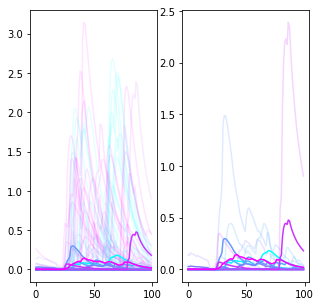

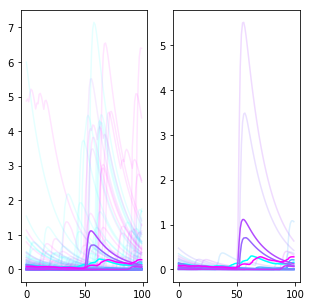

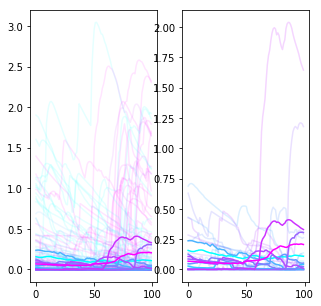

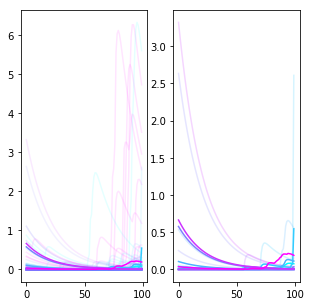

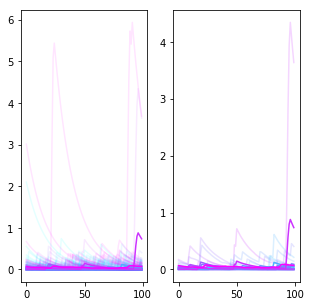

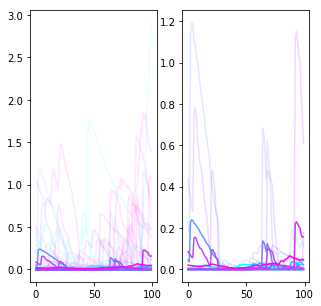

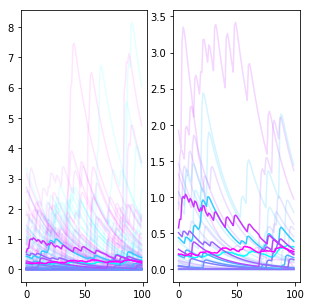

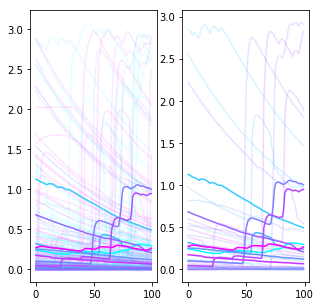

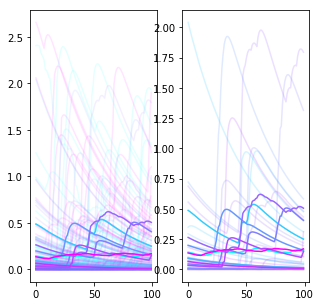

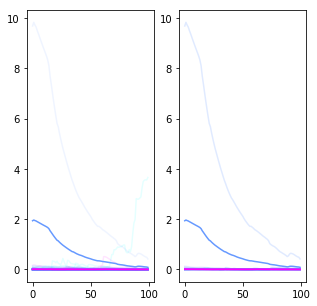

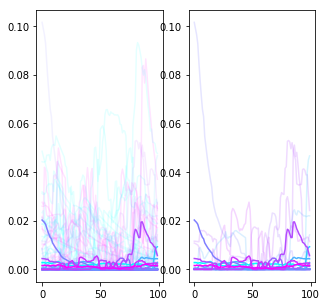

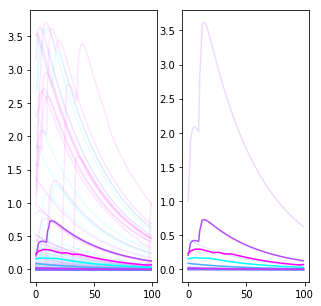

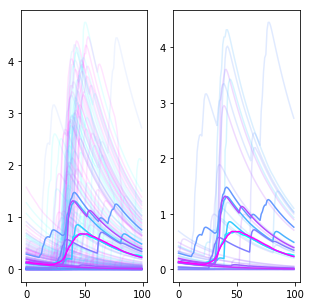

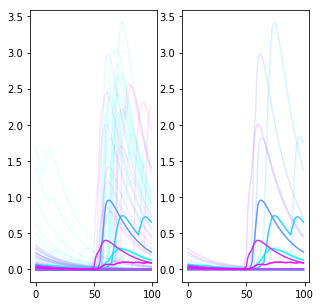

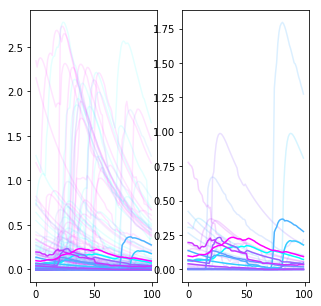

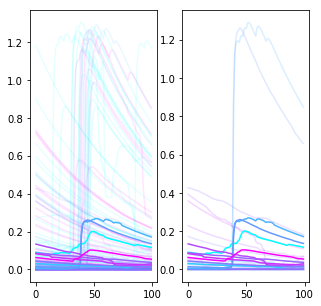

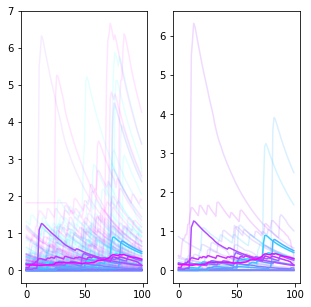

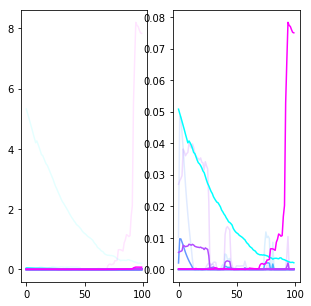

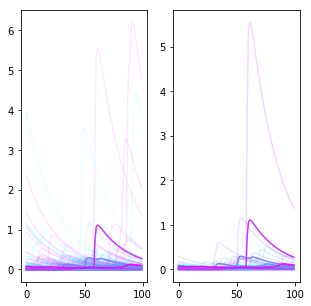

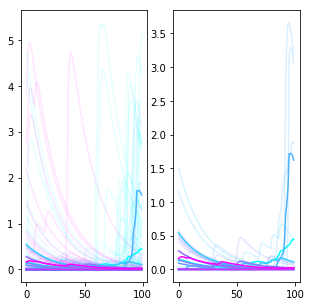

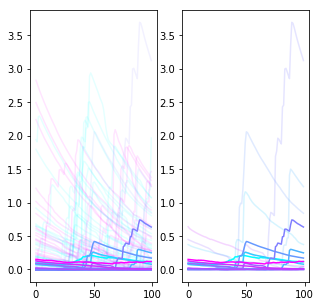

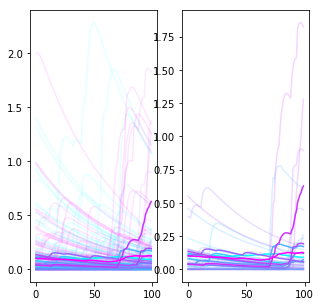

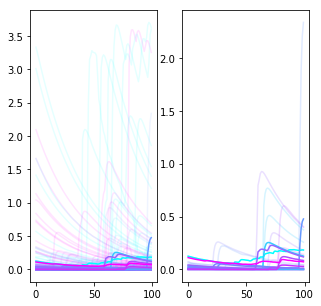

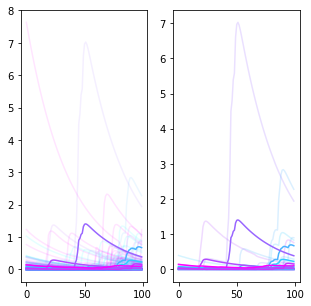

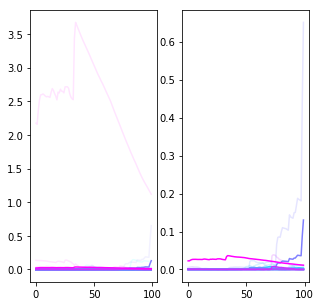

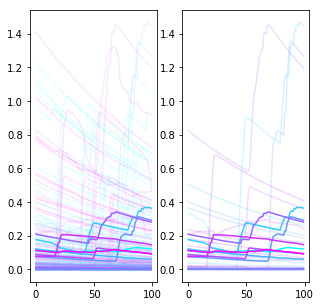

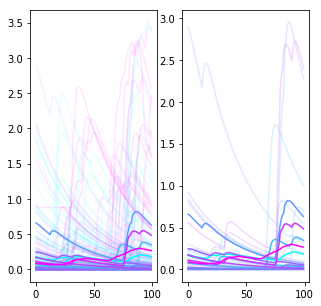

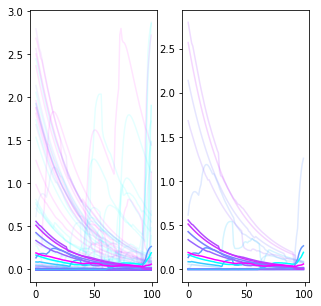

In [17]:
for j in range(50):
    f,ax = plt.subplots(1,2,figsize=[5,5])

    for ind,t in enumerate(tstart_inds.tolist()):
        ax[0].plot(trialMat[ind,:,j],c=plt.cm.cool(morphVec[ind]),alpha=.1)
        

        if (morphVec[ind]!=1.0) and (morphVec[ind]!=0.0):
            ax[1].plot(trialMat[ind,:,j],c=plt.cm.cool(behavior['morph'].values[t]),alpha=.2)
            

    
    for i,val in enumerate(morphVals.tolist()):
        ax[0].plot(np.squeeze(morphAvg[i,:,j]),c=plt.cm.cool(val))
        ax[1].plot(np.squeeze(morphAvg[i,:,j]),c=plt.cm.cool(val))

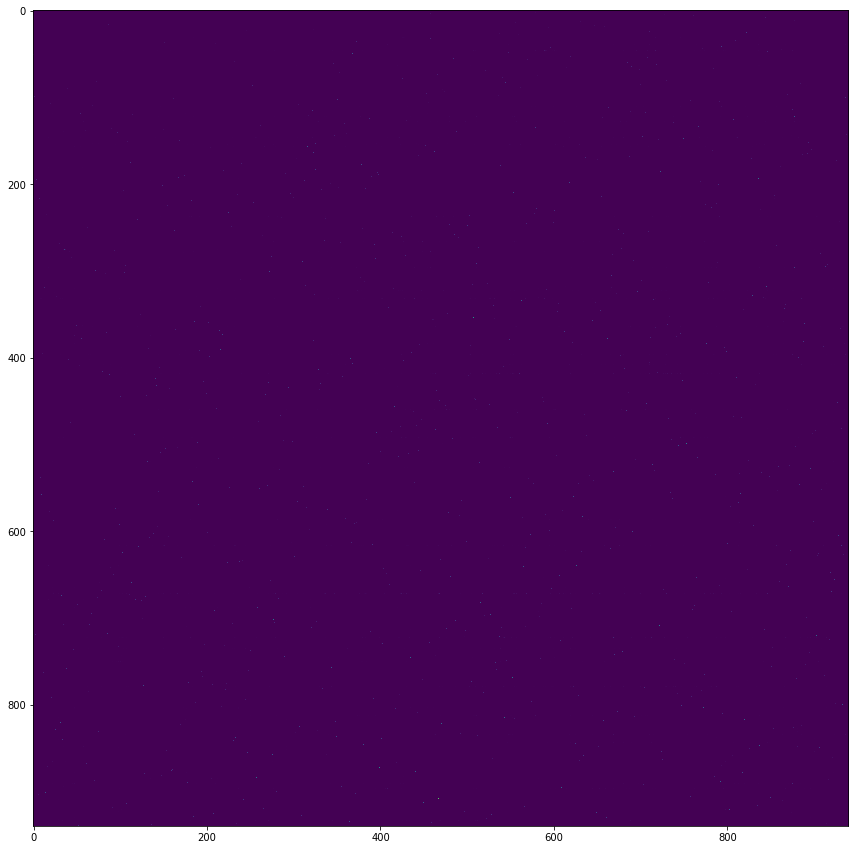

In [23]:
f, ax = plt.subplots(1,1,figsize=[15,15])
ax.imshow(nmf.components_)

(array([939.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.49240704, 0.98481409, 1.47722113, 1.96962817,
        2.46203522, 2.95444226, 3.4468493 , 3.93925635, 4.43166339,
        4.92407044]),
 <a list of 10 Patch objects>)

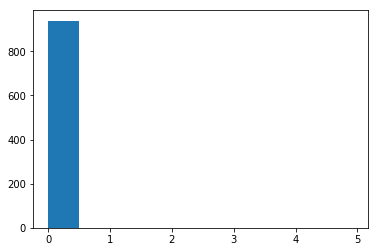

In [25]:
f,ax = plt.subplots()
ax.hist(nmf.components_[10,:].ravel())

(array([42971.,   227.,   110.,    89.,   110.,   108.,   106.,    88.,
           88.,    47.]),
 array([2.42906507e-09, 9.99743091e-01, 1.99948618e+00, 2.99922927e+00,
        3.99897236e+00, 4.99871545e+00, 5.99845854e+00, 6.99820162e+00,
        7.99794471e+00, 8.99768780e+00, 9.99743089e+00]),
 <a list of 10 Patch objects>)

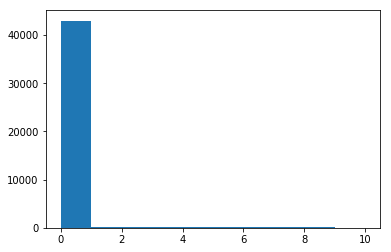

In [22]:
f,ax = plt.subplots()
ax.hist(nmf.components_.ravel()[np.where((nmf.components_.ravel()>0) & (nmf.components_.ravel()<10))[0]])